In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from tqdm import tqdm

In [2]:
two_dim = False
inputname = 'P_input4.txt'
outputname = 'P_output4.txt'
orbit_plot = True
input_plot = False #if True plots the initial distribution from the input

In [3]:
def input_opening(inputname = ''):
    inputf = open(inputname, 'r')

    N = int(inputf.readline())
    n_dim = int(inputf.readline())
        
    t_0 = float(inputf.readline())

    mass_0 = []
    for i in range(3, N+3):
        mass_0.append(float(inputf.readline()))
        
    mass_0 = np.array(mass_0)
    
    #the initial positions are arranged in an array where the first index gives the particle 
    #and the second gives the direction
    position_0 = []
    for i in range(N+4, 2*N + 4):
        position_0.append((inputf.readline()).rstrip())
        
    position_0 = [p.split() for p in position_0]

    for i in range(N):
        for j in range(n_dim):
            position_0[i][j] = float(position_0[i][j])
            
    position_0 = np.array(position_0)

    #the initial velocities are arranged just like the positions
    velocity_0 = []
    for i in range(2*N + 5, 3*N + 5):
        velocity_0.append((inputf.readline()).rstrip())
        
    velocity_0 = [v.split() for v in velocity_0]

    for i in range(N):
        for j in range(n_dim):
            velocity_0[i][j] = float(velocity_0[i][j])
            
    velocity_0 = np.array(velocity_0)
    inputf.close() 
    
    return N, t_0, mass_0, position_0, velocity_0

def output_opening(outputname = ''):
    outputf = open(outputname, 'r')
    output = outputf.readlines() #reading all the lines as one compact object
    outputf.close()

    output = [o.split() for o in output]  #splitting them in each line
    #output is a list of each line, where each line is a list itself

    N = int(output[0][0]) #taking the first element as the # of particles
    output_l = len(output) #checking the length of the file
    snapshot_n = int(output_l/(3 + 3*N)) #and dividing by 3*N + 3 to get the # of snapshots
    
    time = np.empty(snapshot_n)
    time = [float(output[i][0]) for i in range(2, output_l, 3*N + 3)]
    
    position = np.empty([N, snapshot_n, 3]) #position of i particle at s snapshot 
    velocity = np.empty([N, snapshot_n, 3]) #same as position
    
    for i in range(N):
        for j, k in zip(range(snapshot_n), range(3 + N + i, output_l, 3*N + 3)):
            position[i][j] = output[k]
    
    for i in range(N):
        for j, k in zip(range(snapshot_n), range(3 + 2*N + i, output_l, 3*N + 3)):
            velocity[i][j] = output[k]
    
    return snapshot_n, time, position, velocity

In [4]:
n_particles, init_t, mass, init_p, init_v = input_opening(inputname)

if input_plot:
    fig = plt.figure()
    if (two_dim == True):
        ax = fig.add_subplot()
        for i in range(n_particles): ax.scatter(init_p[i][0], init_p[i][1], color = 'b')
        ax.set(xlabel = 'x', ylabel = 'y', title = str(n_particles) + ' particles')
    else:
        ax = fig.add_subplot(projection='3d')
        for i in range(n_particles): ax.scatter(init_p[i][0], init_p[i][1], init_p[i][2], color = 'b', s = 1)
        ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z', title = str(n_particles) + ' particles')

    plt.show()

In [5]:
snap_number, time, positions, velocities = output_opening(outputname)
snap_number

101

In [6]:
radius = []
for i in range(n_particles): radius.append(np.sqrt(positions[i, :, 0]**2 + positions[i, :, 1]**2 + positions[i, :, 2]**2))
radius = np.array(radius)

Text(0.5, 0, 'time')

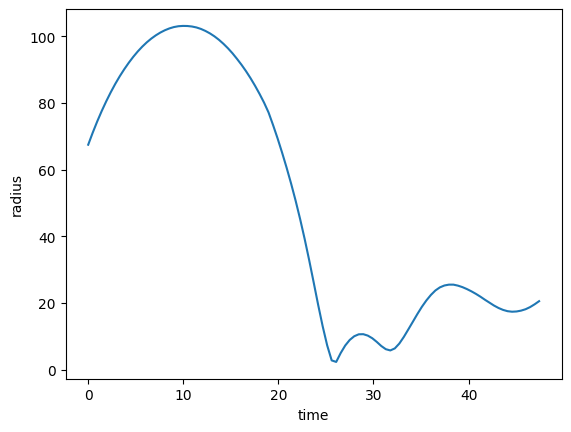

In [7]:
plt.plot(time, radius[0])
plt.ylabel('radius')
plt.xlabel('time')

Text(0.5, 0, 'time')

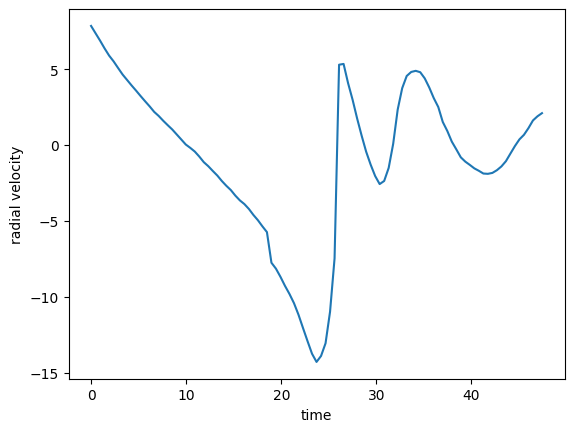

In [8]:
radial_v = []
for i in range(n_particles): radial_v.append((positions[i, :, 0]*velocities[i, :, 0] + positions[i, :, 1]*velocities[i, :, 1] + positions[i, :, 2]*velocities[i, :, 2])/radius[i, :])
radial_v = np.array(radial_v)

plt.plot(time, radial_v[0])
plt.ylabel('radial velocity')
plt.xlabel('time')

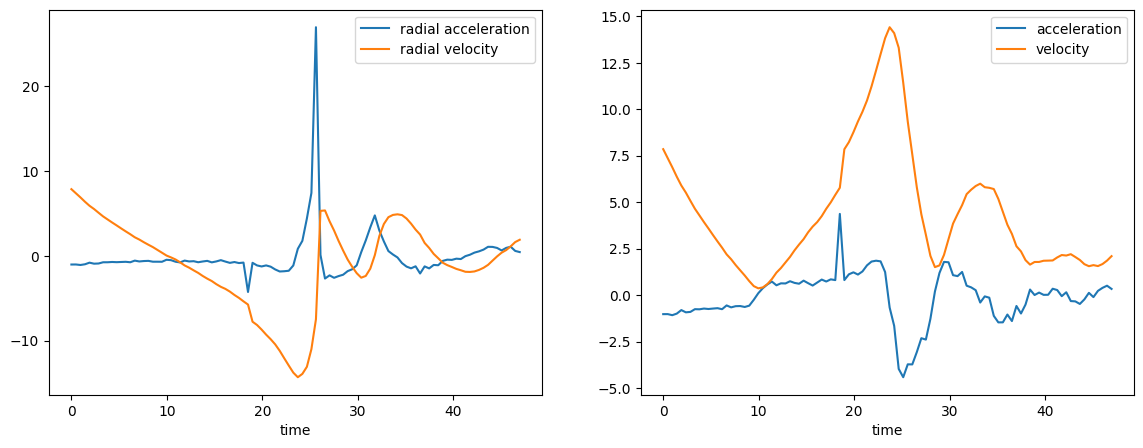

In [9]:
r_acc = np.diff(radial_v) / np.diff(time)

fig = plt.figure(figsize = (14, 5))

ax = fig.add_subplot(121)
ax.plot(time[0:(snap_number - 1)], r_acc[0], label = 'radial acceleration')
ax.plot(time[0:(snap_number - 1)], radial_v[0][0:100], label = 'radial velocity')
ax.set(xlabel = 'time')
plt.legend()

tot_v = []
for i in range(n_particles): tot_v.append(np.sqrt(velocities[i, :, 0]**2 + velocities[i, :, 1]**2 + velocities[i, :, 2]**2))
tot_v = np.array(tot_v)
acc = np.diff(tot_v) / np.diff(time)

ax = fig.add_subplot(122)

plt.plot(time[0:(snap_number - 1)], acc[0], label = 'acceleration')
plt.plot(time[0:(snap_number - 1)], tot_v[0][0:100], label = 'velocity')
ax.set(xlabel = 'time')
plt.legend()

plt.show()

# ??

Se il modulo di v è uguale in ogni sistema di coordinate, allora:

$$ |v| = \sqrt{v_x^2 + v_y^2 + v_z^2} = \sqrt{v_r^2 + v_\theta^2 + v_\phi^2} $$

Poi, se il momento angolare è definito come:

$$ L = m\vec r \times \vec v$$

la mia velocità perpendicolare al raggio è $\sqrt{v_\theta^2 + v_\phi^2}$ e posso ottenerla da:

$$v_\theta^2 + v_\phi^2 = |v|^2 - v_r^2$$ 

ovvero:

$$\sqrt{v_\theta^2 + v_\phi^2} = \sqrt{|v|^2 - v_r^2}$$ 

Proviamo a dimostrarlo così:

$$mrv= m\vec r \cdot \vec v + m\vec r \times \vec v $$

$$m\vec r \times \vec v = mr|v| - mrv_r$$

ang momentum values < 50:  [[0.]]
dynamical time maybe:  0.0
position of perturber at dyn time:  [67.5  0.   0. ]  and radius:  67.5
minimum radius:  2.3592190653966956  reached at time:  26.079485  where ang mom =  1275.3692125264715
7.565951413058561


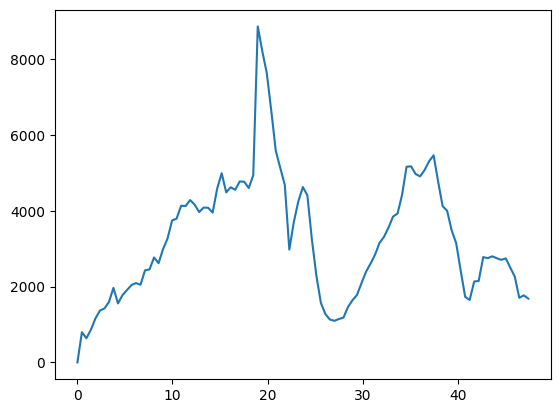

In [10]:
perp_vel = np.sqrt(tot_v ** 2 - radial_v**2)
ang_mom = 100 * radius[0] * perp_vel[0]

plt.plot(time, ang_mom)
i_check = np.array(np.where(ang_mom < 100))
print('ang momentum values < 50: ', ang_mom[i_check])
print('dynamical time maybe: ', time[i_check[0, 0]])
print('position of perturber at dyn time: ', positions[0, i_check[0, 0], :], ' and radius: ', radius[0, i_check[0, 0]])
r_min_i = np.where(radius[0] == min(radius[0]))
print('minimum radius: ', min(radius[0]), ' reached at time: ', time[r_min_i[0][0]], ' where ang mom = ', ang_mom[r_min_i[0][0]])
print(tot_v[0][r_min_i[0][0]])

In [16]:
#a = 5
#pot = []
#for i in range(n_particles): pot.append(n_particles / np.sqrt(a**2 + radius[i]**2))
#eps = np.abs(pot - 0.5 * radial_v**2)
#f_eps = eps **(7/2)
#plt.plot(time, f_eps[0])

In [17]:
#for i in range(snap_number):
#    v_0 = velocities[0, i, :] - velocities[1:, i, :]
#    v_0 = np.sqrt(v_0[:, 0]**2 + v_0[:, 1]**2 + v_0[:, 2]**2)
#    l = 25 * (v_0**4) / 101**2
#    constant = -16 * np.pi**2 * 101 * np.log(np.sqrt(l))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 262.84it/s]


starting animation


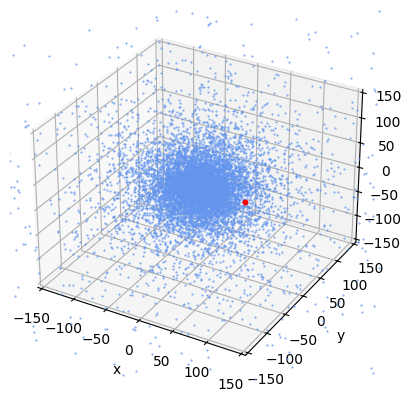

frame:  0 / 101 

frame:  0 / 101 

frame:  1 / 101 

frame:  2 / 101 

frame:  3 / 101 

frame:  4 / 101 

frame:  5 / 101 

frame:  6 / 101 

frame:  7 / 101 

frame:  8 / 101 

frame:  9 / 101 

frame:  10 / 101 

frame:  11 / 101 

frame:  12 / 101 

frame:  13 / 101 

frame:  14 / 101 

frame:  15 / 101 

frame:  16 / 101 

frame:  17 / 101 

frame:  18 / 101 

frame:  19 / 101 

frame:  20 / 101 

frame:  21 / 101 

frame:  22 / 101 

frame:  23 / 101 

frame:  24 / 101 

frame:  25 / 101 

frame:  26 / 101 

frame:  27 / 101 

frame:  28 / 101 

frame:  29 / 101 

frame:  30 / 101 

frame:  31 / 101 

frame:  32 / 101 

frame:  33 / 101 

frame:  34 / 101 

frame:  35 / 101 

frame:  36 / 101 

frame:  37 / 101 

frame:  38 / 101 

frame:  39 / 101 

frame:  40 / 101 

frame:  41 / 101 

frame:  42 / 101 

frame:  43 / 101 

frame:  44 / 101 

frame:  45 / 101 

frame:  46 / 101 

frame:  47 / 101 

frame:  48 / 101 

frame:  49 / 101 

frame:  50 / 101 

frame:  51 / 101 

fram

In [19]:
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d', computed_zorder=False)

ax.scatter(positions[0][0][0], positions[0][0][1], positions[0][0][2], marker = 'o', s = 10, color = 'red', zorder = 1)

for i in tqdm(range(1, n_particles)):
    ax.scatter(positions[i][0][0], positions[i][0][1], positions[i][0][2], color='cornflowerblue', s = 0.2, zorder=0)
    ax.set(xlim = [-150, 150], ylim = [-150, 150], zlim = [-150, 150], xlabel='x', ylabel='y', zlabel = 'z')


print('starting animation')
def update(frame):
    print('frame: ', frame, '/', snap_number, '\n')
    # for each frame, update the data stored on each artist.
    # update the scatter plot:
    ax.cla()
    for i in range(1, n_particles):
        ax.scatter(positions[i][frame][0], positions[i][frame][1], positions[i][frame][2], marker = 'o', color = 'cornflowerblue', s = 0.2, zorder=0)
        ax.set(xlim = [-150, 150], ylim = [-150, 150], zlim = [-150, 150], xlabel='x', ylabel='y', zlabel = 'z')
    ax.scatter(positions[0][frame][0], positions[0][frame][1], positions[0][frame][2], marker = 'o', s = 6, color = 'red', zorder=1)
    
ani = animation.FuncAnimation(fig, update, snap_number, interval=30)
plt.show()

ani.save('perturber4.gif')